In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [2]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

8


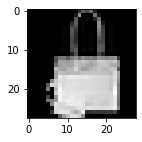

3


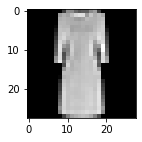

9


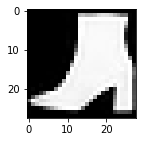

1


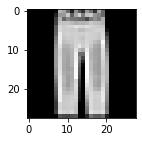

In [4]:
for i in range(333,337):
    plt.figure(figsize=(2,2))
    img = x_train[i]
    plt.imshow(img)
    print(y_train[i])
    plt.show()


In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4155 - accuracy: 0.8513
Epoch 2/3
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2872 - accuracy: 0.8958
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2426 - accuracy: 0.9119


In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2704 - accuracy: 0.9013


[0.2703777551651001, 0.9013000130653381]

In [18]:
predictions= model.predict(x_test)
print(predictions)

[[2.89808918e-06 1.51115921e-06 7.68565224e-06 ... 4.39780857e-03
  1.41814962e-04 9.95076120e-01]
 [1.40060904e-04 2.04084061e-09 9.99632716e-01 ... 5.39532048e-12
  7.72166941e-10 2.69881686e-12]
 [2.87964905e-08 1.00000000e+00 2.40724191e-10 ... 4.74204043e-14
  1.13936204e-11 1.48628380e-14]
 ...
 [4.57462796e-04 5.12581266e-09 1.01310077e-04 ... 3.48496414e-08
  9.98958230e-01 3.56321261e-09]
 [8.06019727e-07 9.99970317e-01 1.06522272e-07 ... 1.65045821e-09
  5.53680835e-09 6.30262349e-08]
 [6.31507603e-04 3.09835159e-05 1.16814766e-03 ... 1.03827775e-01
  7.92295393e-03 7.01405457e-04]]


ankle boots


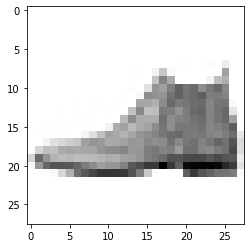

In [52]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
D={0:'T-shirt', 1:'Trouser' ,2:'pull', 3:'Dress' ,4:'Coat' ,5:'Sandals', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'ankle boots'} 
print(D[pred.argmax()])
#print(y_test[image_index])